# Creates gif of the evolution of the training process
The plot contains two subplots
- Level sets of the predictions of the model at epoch
- Loss at epoch

In [15]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
torch.manual_seed(2)
torch.cuda.manual_seed(2)

g = torch.Generator()
g.manual_seed(1)


# Data preparation

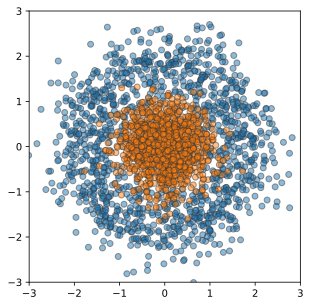

In [16]:
data_noise = 0.25
plotlim = [-3, 3]
subfolder = 'evo_circ'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('circles', noise = data_noise, plotlim = plotlim)


In [17]:
#We can now conveniently access the data from the dataloaders
for X_test, y_test in dataloader_viz:
    print(X_test[:10], y_test[:10])
    break
    

tensor([[-5.0406e-01,  1.4754e-02],
        [-2.2176e+00, -2.2191e-01],
        [-2.6202e-03, -2.2924e-01],
        [-1.4166e+00, -3.8373e-01],
        [ 3.9139e-02, -3.5560e-01],
        [ 1.1496e+00,  9.3491e-01],
        [ 3.9663e-01, -9.5017e-02],
        [ 7.1716e-01,  1.1677e+00],
        [ 2.6743e+00,  9.9872e-01],
        [-7.0010e-01,  7.9120e-01]]) tensor([1, 0, 1, 1, 1, 0, 1, 1, 0, 0])


# Model dynamics

In [18]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 5, 20 
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = True
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'inside' #outside



torch.manual_seed(2)
torch.cuda.manual_seed(2)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3) 


print(anode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
        (10): Linear(in_features=2, out_features=2, bias=True)
        (11): Linear(in_features=2, out_features=2, bias=True)
        (12): Linear(in_features=2, out_features=2, bias=True)
        (13): Linear(in_features=2, out_features=2, bias=True)
        (14

In [19]:
torch.manual_seed(2)
torch.cuda.manual_seed(2)
rnode = NeuralODE(device, data_dim, hidden_dim, augment_dim=0, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_rnode = torch.optim.Adam(rnode.parameters(), lr=1e-3) 


print(rnode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
        (10): Linear(in_features=2, out_features=2, bias=True)
        (11): Linear(in_features=2, out_features=2, bias=True)
        (12): Linear(in_features=2, out_features=2, bias=True)
        (13): Linear(in_features=2, out_features=2, bias=True)
        (14

# Training and generating level sets


Iteration 0/38
Loss: 0.921
Robust Term Loss: 0.138
Accuracy: 0.328

Iteration 10/38
Loss: 0.767
Robust Term Loss: 0.103
Accuracy: 0.453

Iteration 20/38
Loss: 0.892
Robust Term Loss: 0.116
Accuracy: 0.344

Iteration 30/38
Loss: 0.727
Robust Term Loss: 0.099
Accuracy: 0.453
Epoch 1: 0.853

Iteration 0/38
Loss: 0.797
Robust Term Loss: 0.094
Accuracy: 0.391

Iteration 10/38
Loss: 0.803
Robust Term Loss: 0.092
Accuracy: 0.375

Iteration 20/38
Loss: 0.802
Robust Term Loss: 0.087
Accuracy: 0.406

Iteration 30/38
Loss: 0.652
Robust Term Loss: 0.067
Accuracy: 0.531
Epoch 2: 0.794

Iteration 0/38
Loss: 0.775
Robust Term Loss: 0.074
Accuracy: 0.391

Iteration 10/38
Loss: 0.772
Robust Term Loss: 0.078
Accuracy: 0.359

Iteration 20/38
Loss: 0.817
Robust Term Loss: 0.074
Accuracy: 0.266

Iteration 30/38
Loss: 0.781
Robust Term Loss: 0.070
Accuracy: 0.359
Epoch 3: 0.762

Iteration 0/38
Loss: 0.791
Robust Term Loss: 0.074
Accuracy: 0.359

Iteration 10/38
Loss: 0.716
Robust Term Loss: 0.066
Accuracy:

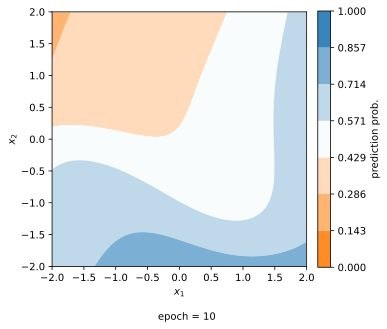

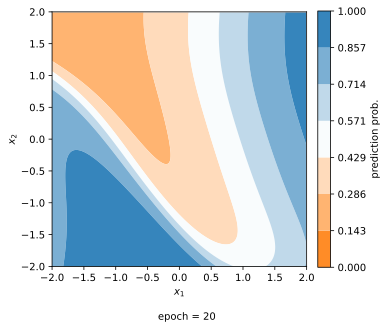

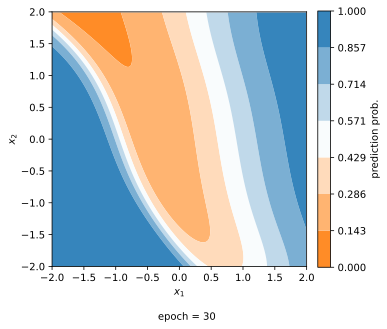

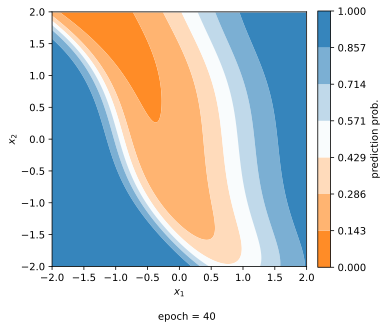

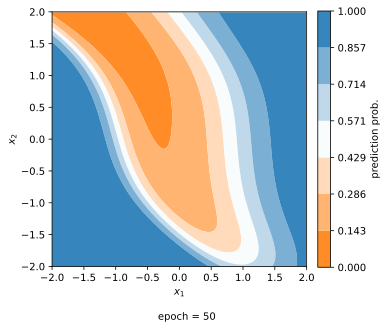

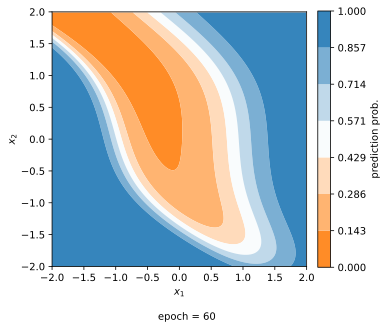

In [20]:
from models.training import Trainer, doublebackTrainer
import imageio, os
from plots.plots import train_to_classifier_imgs

num_epochs = 120 #number of optimization runs in which the dataset is used for gradient decent
plotfreq = 10


trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = 0, eps_comp = 0.2) 

   
train_to_classifier_imgs(anode, trainer_anode, dataloader, subfolder, num_epochs, plotfreq)


Iteration 0/38
Loss: 0.898
Robust Term Loss: 0.135
Accuracy: 0.344

Iteration 10/38
Loss: 0.769
Robust Term Loss: 0.114
Accuracy: 0.406

Iteration 20/38
Loss: 0.756
Robust Term Loss: 0.103
Accuracy: 0.391

Iteration 30/38
Loss: 0.736
Robust Term Loss: 0.092
Accuracy: 0.422
Epoch 1: 0.792

Iteration 0/38
Loss: 0.739
Robust Term Loss: 0.087
Accuracy: 0.438

Iteration 10/38
Loss: 0.646
Robust Term Loss: 0.080
Accuracy: 0.547

Iteration 20/38
Loss: 0.704
Robust Term Loss: 0.074
Accuracy: 0.406

Iteration 30/38
Loss: 0.734
Robust Term Loss: 0.071
Accuracy: 0.328
Epoch 2: 0.714

Iteration 0/38
Loss: 0.680
Robust Term Loss: 0.067
Accuracy: 0.453

Iteration 10/38
Loss: 0.699
Robust Term Loss: 0.068
Accuracy: 0.391

Iteration 20/38
Loss: 0.657
Robust Term Loss: 0.055
Accuracy: 0.422

Iteration 30/38
Loss: 0.666
Robust Term Loss: 0.056
Accuracy: 0.422
Epoch 3: 0.675

Iteration 0/38
Loss: 0.680
Robust Term Loss: 0.057
Accuracy: 0.406

Iteration 10/38
Loss: 0.670
Robust Term Loss: 0.048
Accuracy:

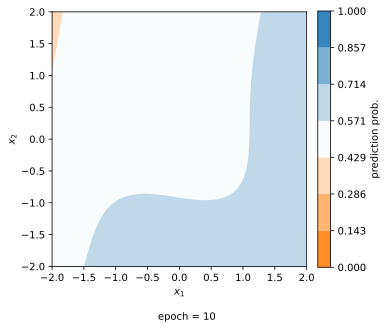

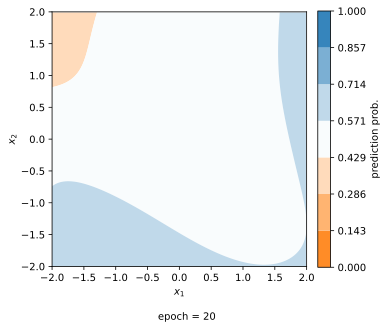

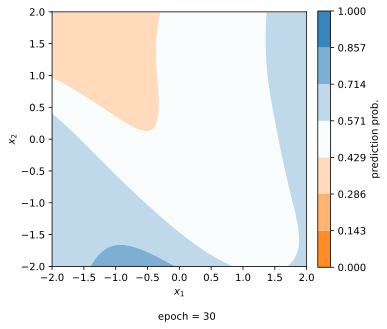

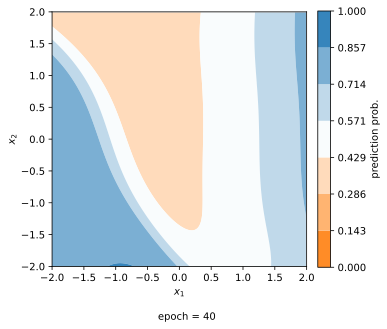

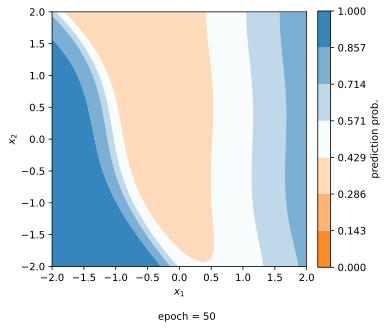

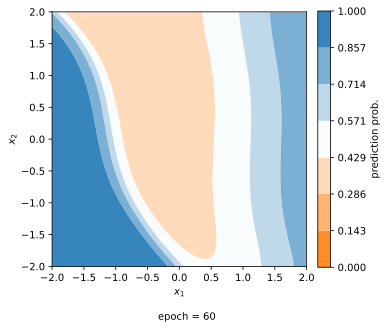

In [21]:
from models.training import Trainer, doublebackTrainer
import imageio, os


trainer_rnode = doublebackTrainer(rnode, optimizer_rnode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = 0.2) 



train_to_classifier_imgs(rnode, trainer_rnode, dataloader, subfolder, num_epochs, plotfreq, filename = 'rob')

# Loss plots

trainer_rnode.eps = 0.2
epoch = 5


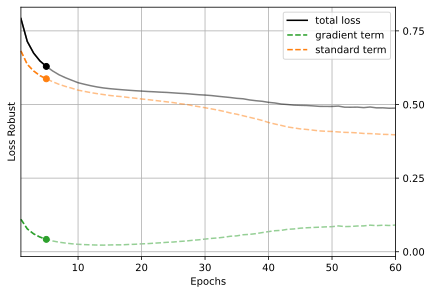

no filename given


In [22]:
from enum import auto

from plots.plots import loss_evolution
print(f'{trainer_rnode.eps = }')
loss_evolution(trainer_rnode, 5)

epoch = 10


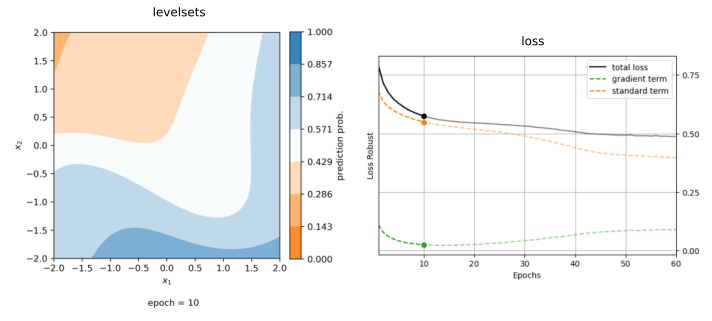

In [23]:
from plots.plots import comparison_plot

epoch = 10
fig_name_base = os.path.join(subfolder, '')
loss_evolution(trainer_rnode, epoch, 'loss_pic')
comparison_plot(fig_name_base + str(epoch) + '.png', 'levelsets', 'loss_pic.png', 'loss', 'test', show = True, figsize = (10,5))

## gif generation

In [24]:
from plots.gifs import evo_gif
gif = evo_gif(trainer_anode, num_epochs, plotfreq, subfolder, '')

10
epoch = 10
20
epoch = 20
30
epoch = 30
40
epoch = 40
50
epoch = 50
60
epoch = 60
evo_circ\evo.gif  created


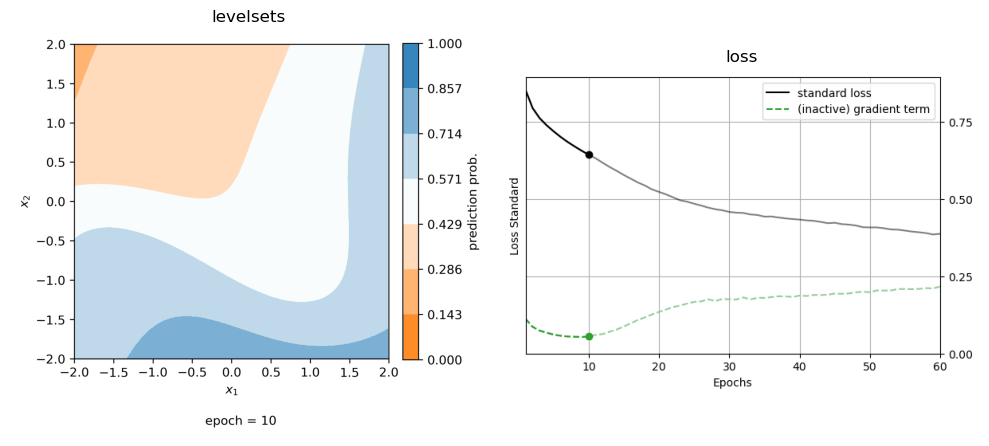

In [25]:
from IPython.display import Image
Image(filename = gif, width = 800)

10
epoch = 10
20
epoch = 20
30
epoch = 30
40
epoch = 40
50
epoch = 50
60
epoch = 60
evo_circ\robevo.gif  created


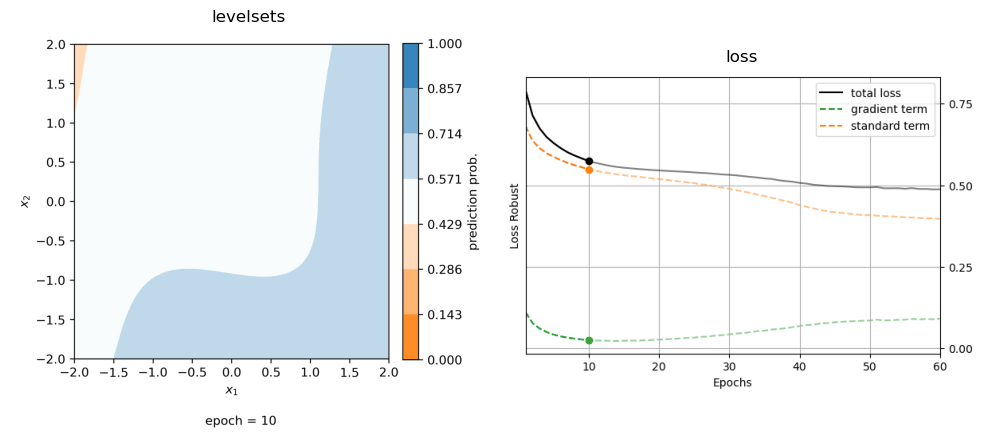

In [26]:
rob_gif = evo_gif(trainer_rnode, num_epochs, plotfreq, subfolder, 'rob')

from IPython.display import Image
Image(filename = rob_gif, width = 800)

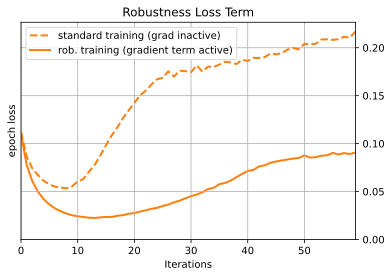

In [27]:
labelsize = 10
plt.plot(trainer_anode.histories['epoch_loss_rob_history'],'--', linewidth = 2, color = 'C1')
plt.title('Robustness Loss Term')
plt.plot(trainer_rnode.histories['epoch_loss_rob_history'], zorder = -1, linewidth = 2, color = 'C1')
plt.xlim(0, len(trainer_rnode.histories['epoch_loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations', size = labelsize)
plt.ylabel('epoch loss', size = labelsize)
plt.legend(['standard training (grad inactive)', 'rob. training (gradient term active)'], prop= {'size': labelsize})
# plt.yticks(np.arange(0,1.25,0.25))
ax = plt.gca()
ax.yaxis.tick_right()
plt.grid()

plt.savefig('loss_comp_grads.png', bbox_inches='tight', dpi=300, format='png', facecolor = 'white')
plt.show()

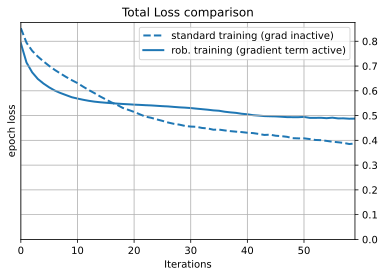

In [28]:
labelsize = 10
plt.plot(trainer_anode.histories['epoch_loss_history'],'--', linewidth = 2, color = 'C0')
plt.title('Total Loss comparison')
plt.plot(trainer_rnode.histories['epoch_loss_history'], zorder = -1, linewidth = 2, color = 'C0')
plt.xlim(0, len(trainer_rnode.histories['epoch_loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations', size = labelsize)
plt.ylabel('epoch loss', size = labelsize)
plt.legend(['standard training (grad inactive)', 'rob. training (gradient term active)'], prop= {'size': labelsize})
# plt.yticks(np.arange(0,1.25,0.25))
ax = plt.gca()
ax.yaxis.tick_right()
plt.grid()

plt.savefig('loss_comp_grads.png', bbox_inches='tight', dpi=300, format='png', facecolor = 'white')
plt.show()